In [61]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

# Data Cleaning

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [66]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [68]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [71]:
df['target'] = encoder.fit_transform(df['target'])

In [73]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [74]:
#check for duplicate values
df.duplicated().sum()

403

In [75]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [76]:
#check for duplicate values
df.duplicated().sum()

0

# EDA

In [78]:
#Exploratory data analysis

In [79]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [81]:
#pie chart
import matplotlib.pyplot as plt

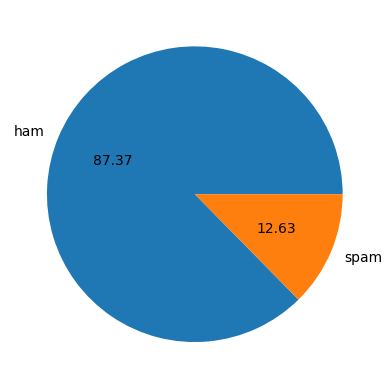

In [82]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [83]:
#data is imbalanced
import nltk

In [84]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bsaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
df['num_characters']= df['text'].apply(len)

In [87]:
#number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [89]:
#number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [91]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [92]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [93]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [94]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

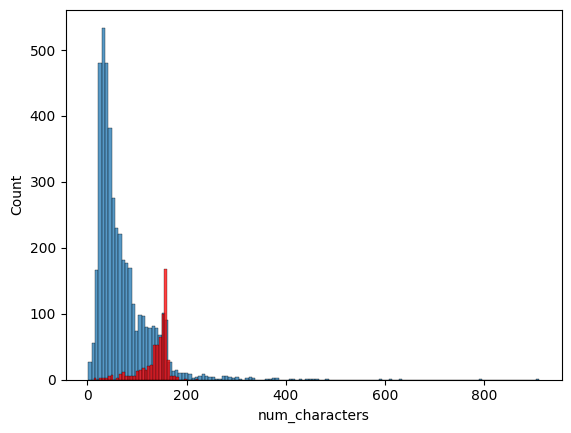

In [95]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

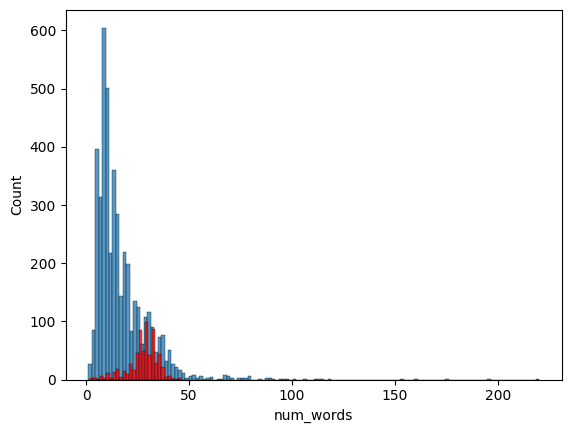

In [96]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

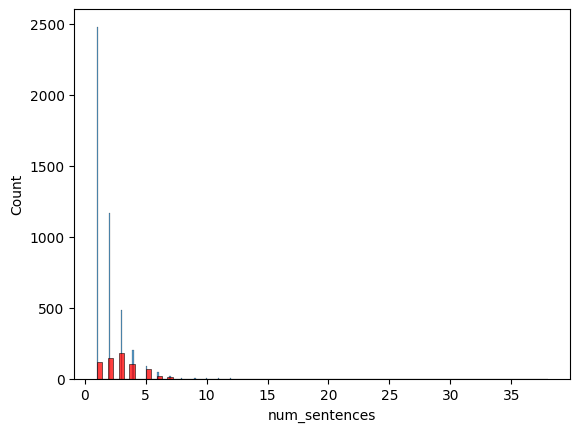

In [97]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='red')

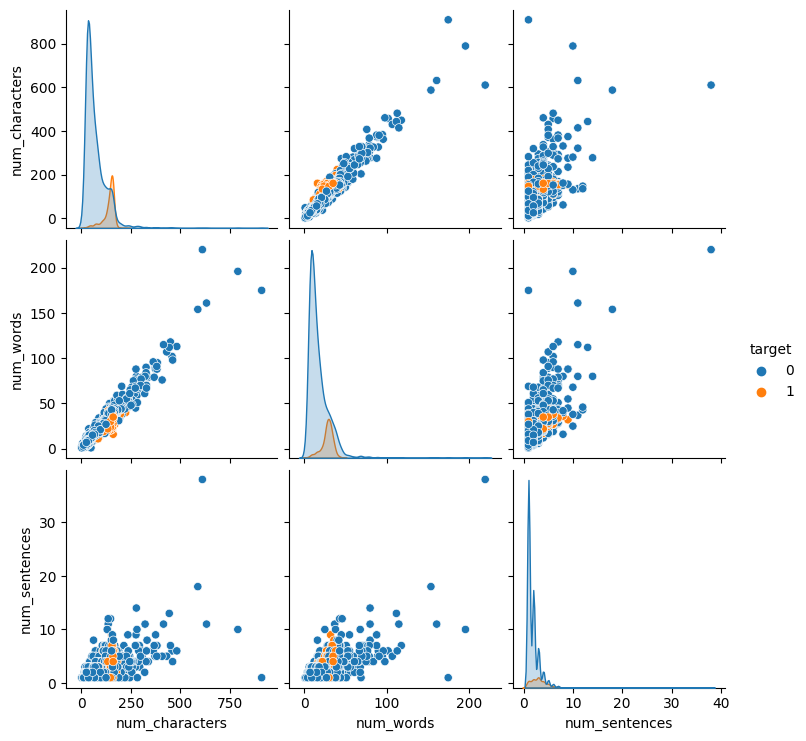

In [98]:
sns.pairplot(df,hue='target')

In [99]:
df2 = df.drop('text',axis=1)

In [100]:
df2.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

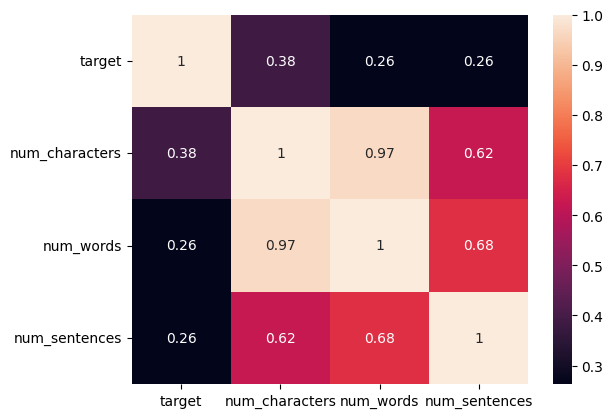

In [101]:
sns.heatmap(df2.corr(),annot=True)

## Data Processing (TEXT Processing)

* Lower Case
* Tokenization
* Removing special character
* Removing stop word and punctuations
* Stemming

In [107]:
import nltk
import string
from nltk.corpus import stopwords

In [112]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    

In [111]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

'love'

In [115]:
df['transformed_text'] = df['text'].apply(transform_text)

In [122]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [123]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

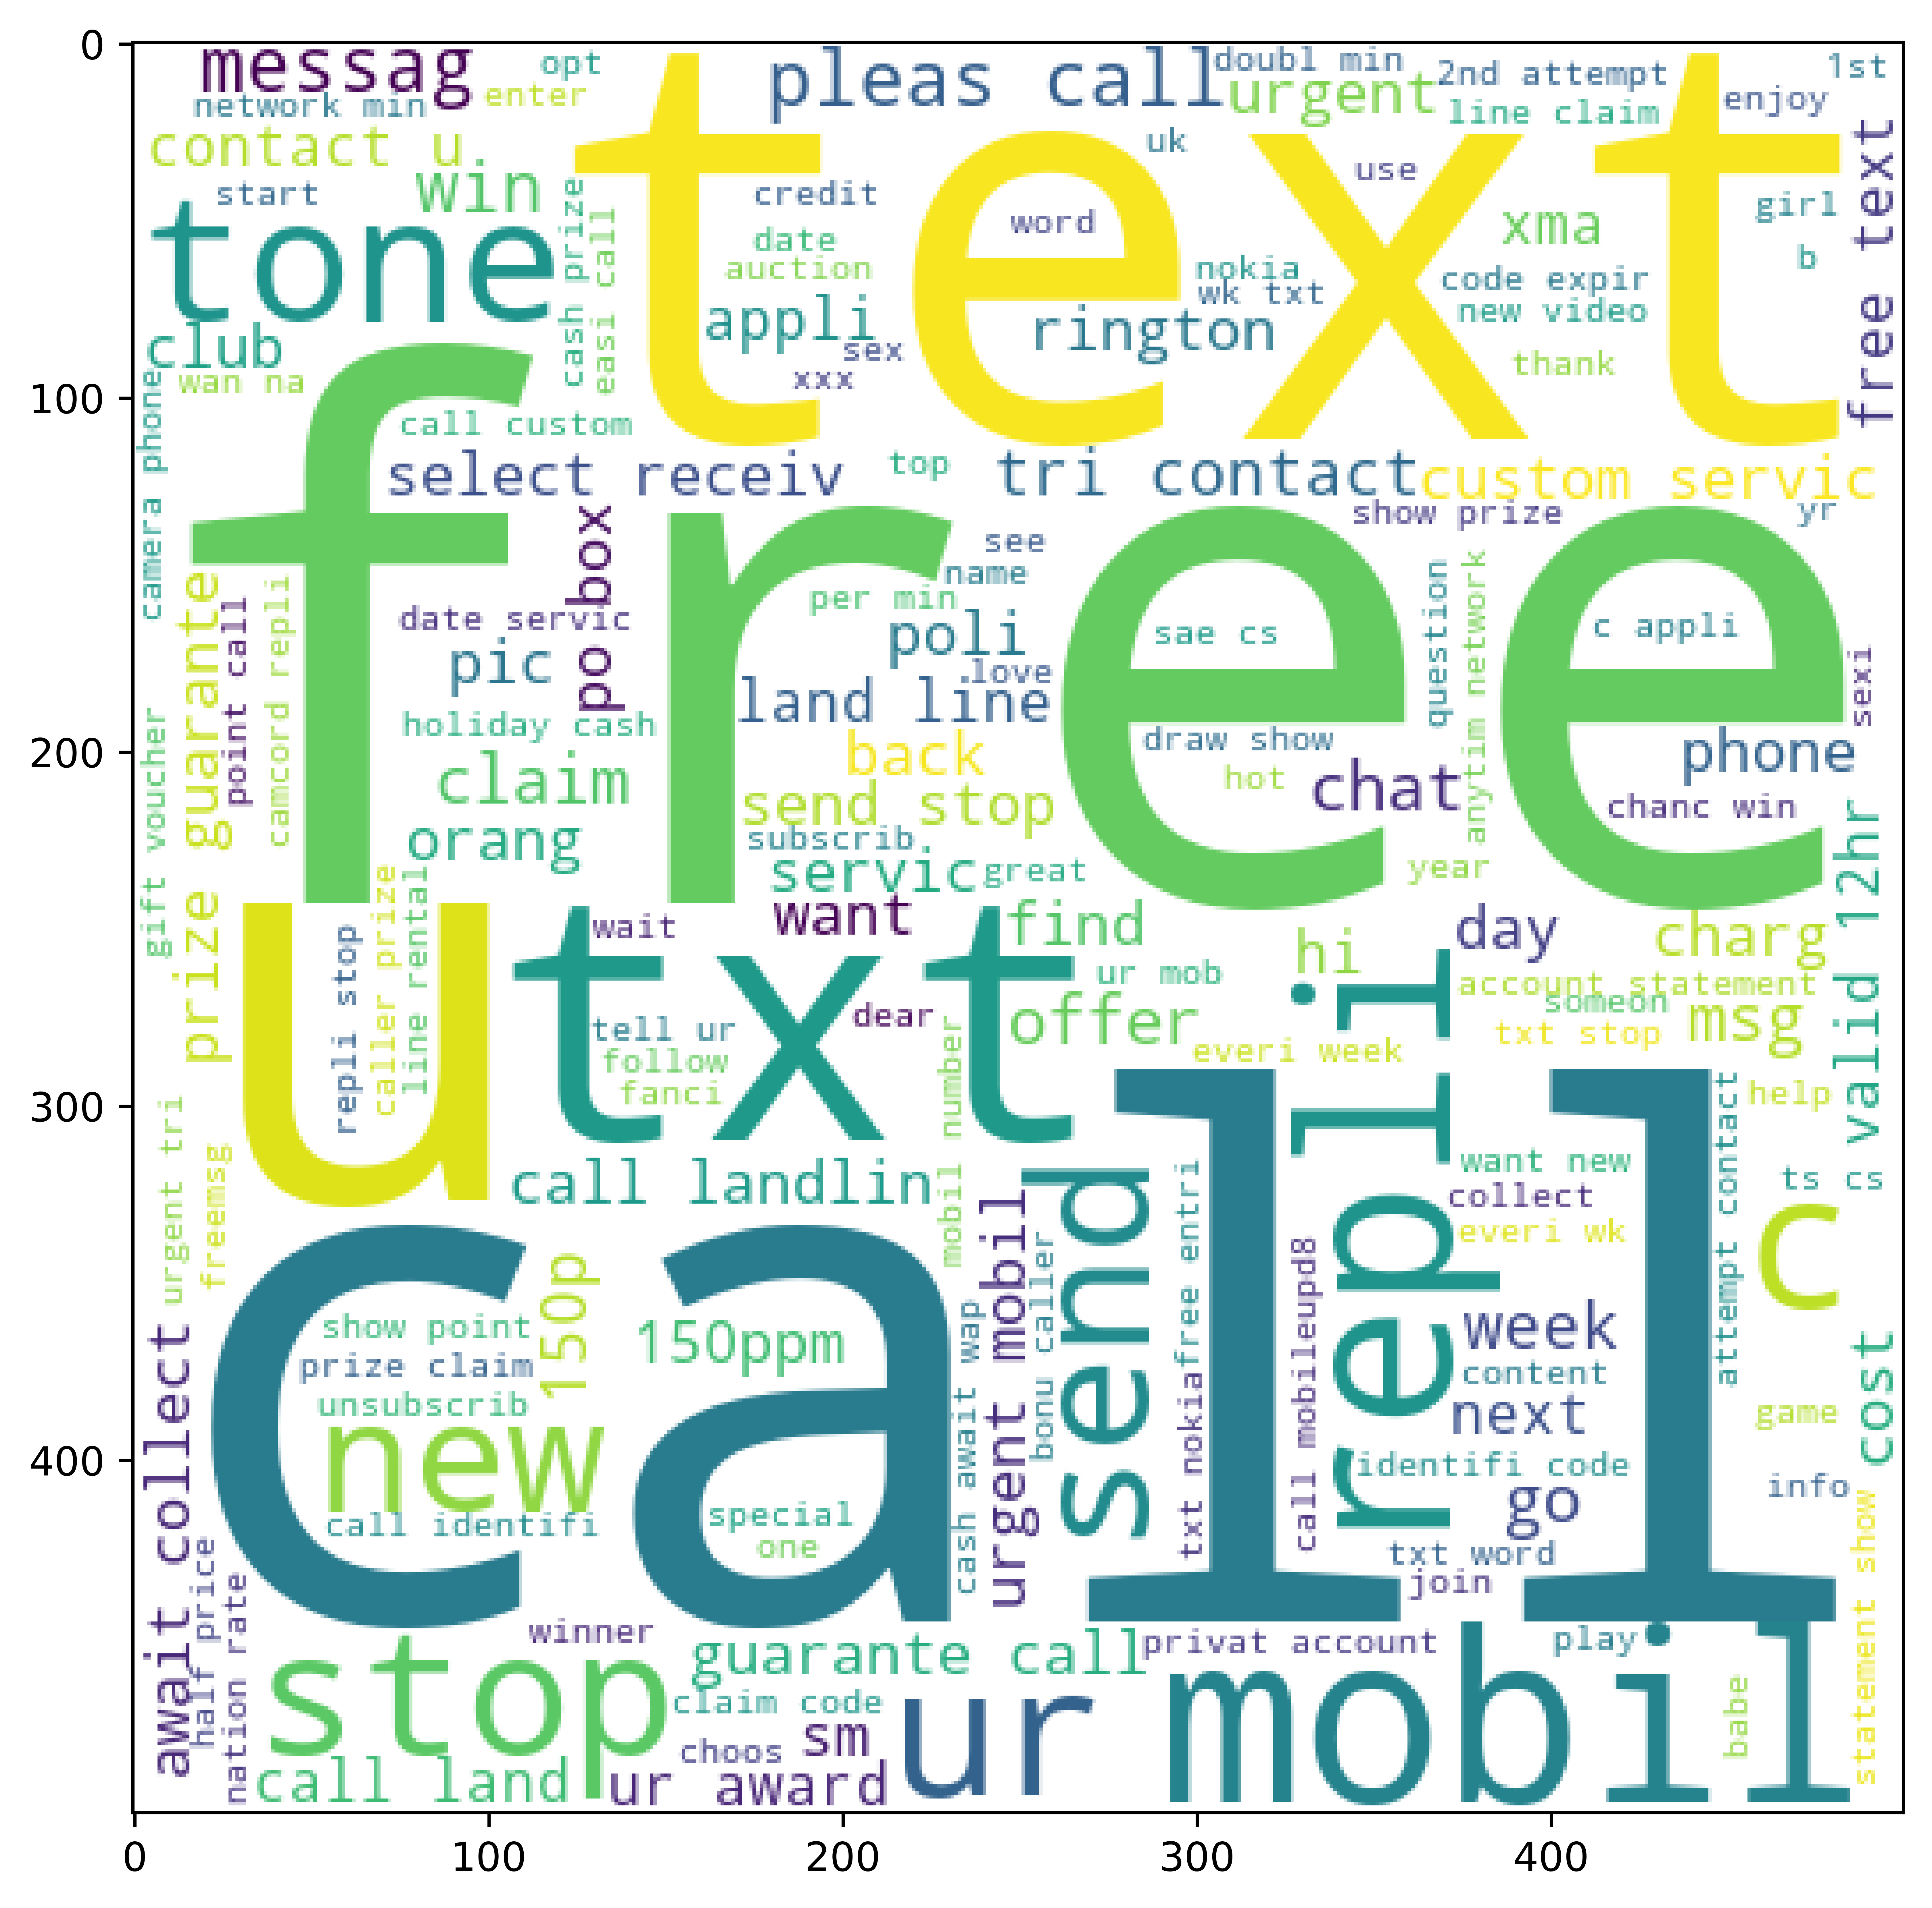

In [126]:
plt.figure(figsize=(12,8),dpi=1000)
plt.imshow(spam_wc)

In [127]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

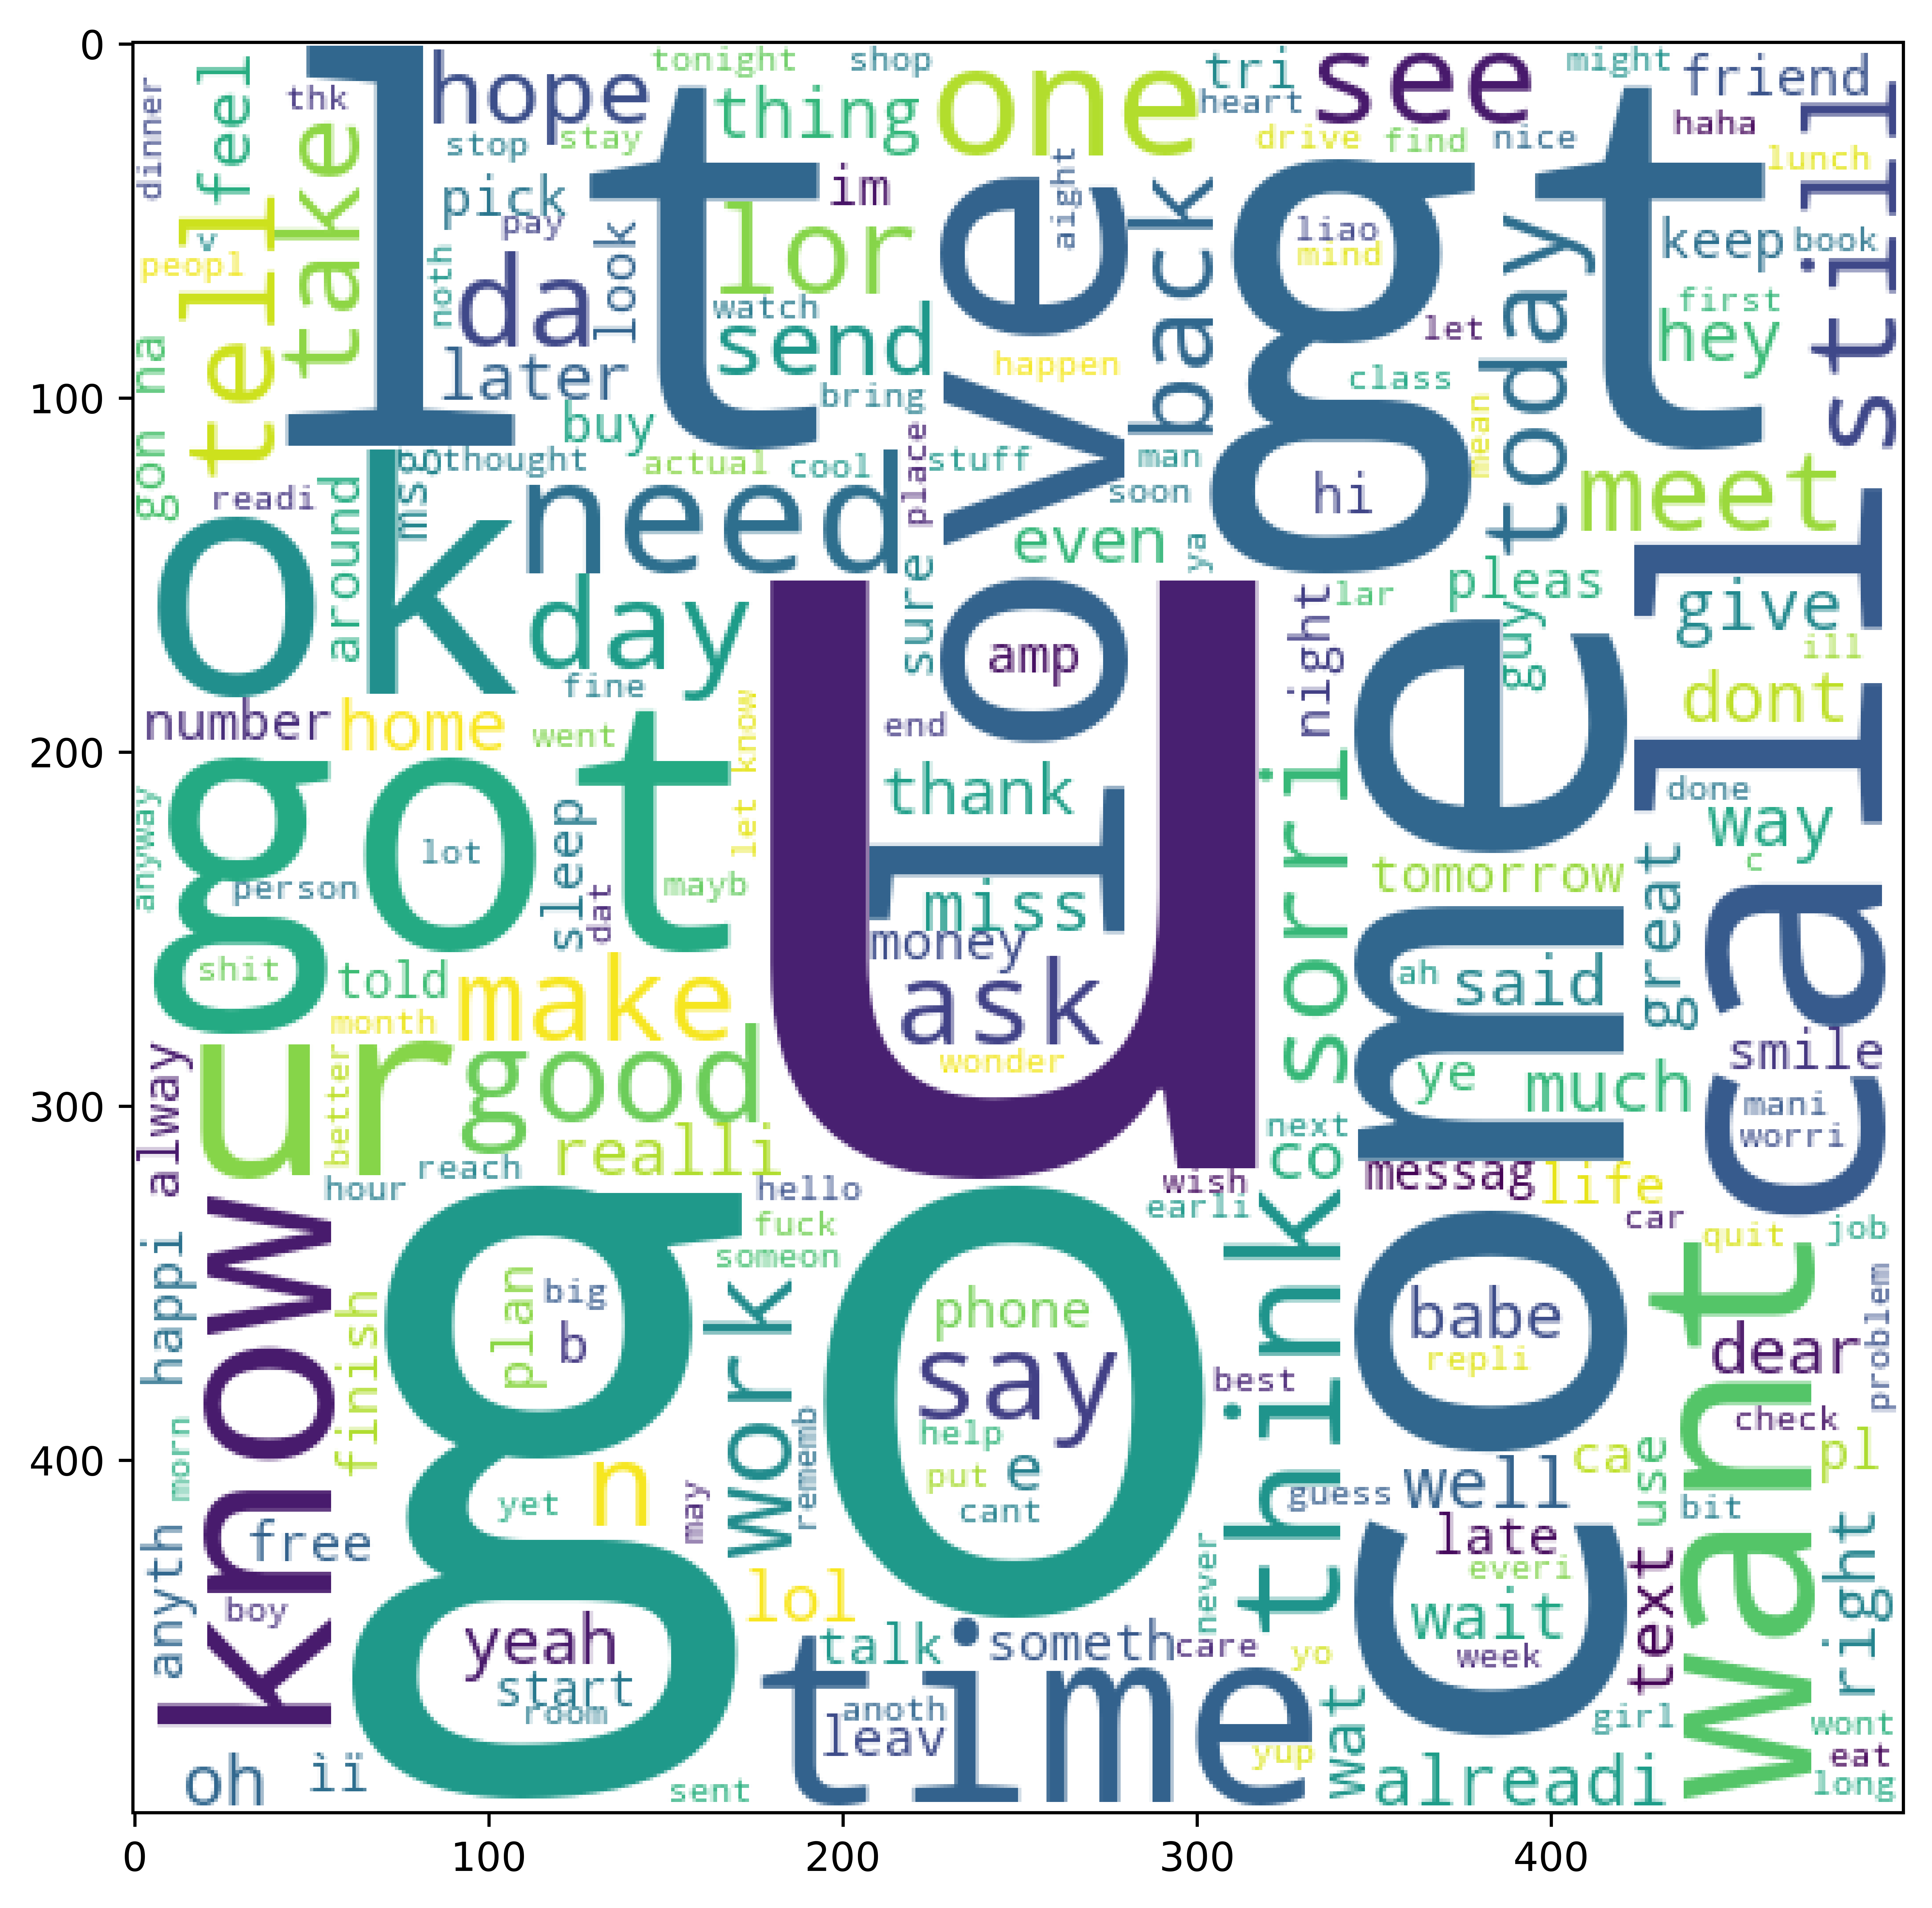

In [128]:
plt.figure(figsize=(12,8),dpi=1000)
plt.imshow(ham_wc)

In [135]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

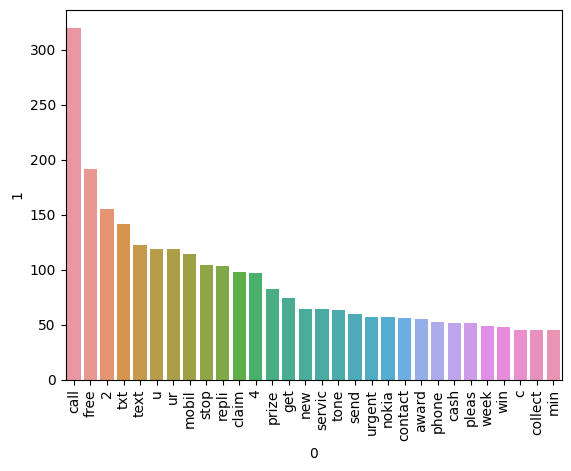

In [146]:
from collections import Counter
counter_obj = Counter(spam_corpus)
most_common_items = counter_obj.most_common(30)

df_most_common = pd.DataFrame(most_common_items, columns=['0','1'])
sns.barplot(data=df_most_common, x='0',y='1')
plt.xticks(rotation = 'vertical')
plt.show()

In [148]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

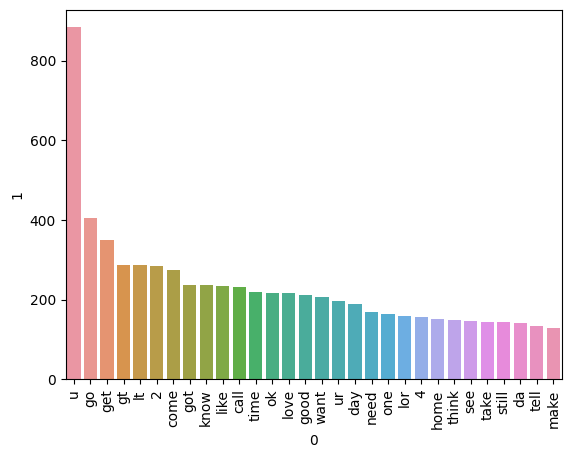

In [150]:
from collections import Counter
counter_obj = Counter(ham_corpus)
most_common_items = counter_obj.most_common(30)

df_most_common = pd.DataFrame(most_common_items, columns=['0','1'])
sns.barplot(data=df_most_common, x='0',y='1')
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [212]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [213]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [216]:
y = df['target'].values

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [220]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [228]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [229]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [223]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [231]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [227]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))